<a href="https://colab.research.google.com/github/ma22c041/ma22c041_2023_PL/blob/main/Assignment9/passengers_of_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn


In [ ]:
t= seaborn.load_dataset('titanic')
t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
print(t)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

TASKS

In [ ]:
num_passengers = t.shape[0] #passengers are described in the data set
print("Number of passengers:", num_passengers)


Number of passengers: 891


In [ ]:
num_distinct_who = t['who'].nunique() #distinct values are in who column
print("Number of distinct values in the 'who' column:", num_distinct_who)


Number of distinct values in the 'who' column: 3


In [ ]:
missing_values = t.isnull().sum()    #missing values do you fnd in each data column
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
passengers_over_60 = t[t['age'] > 60] #data contain passengers over 60 old
num_passengers_over_60 = len(passengers_over_60)
print("Passengers over 60 years old:", num_passengers_over_60)


Passengers over 60 years old: 22


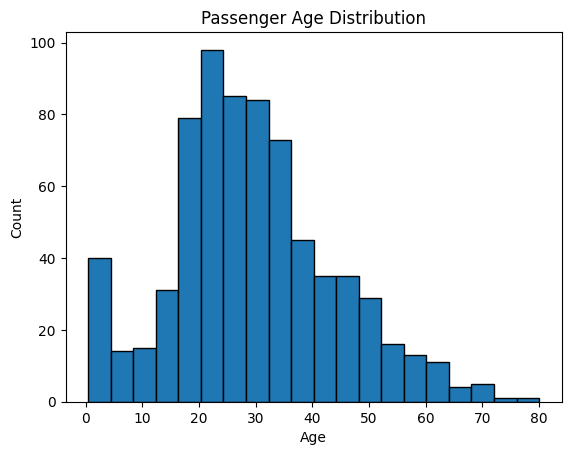

In [ ]:
import matplotlib.pyplot as plt #passenger age distribution

plt.hist(t['age'].dropna(), bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Passenger Age Distribution')
plt.show()


In [ ]:
quantiles = t['age'].quantile([0.25, 0.5, 0.75]) #the 3-quantiles of the passenger age distribution
print("3-Quantiles of Passenger Age Distribution:\n", quantiles)


3-Quantiles of Passenger Age Distribution:
 0.25    20.125
0.50    28.000
0.75    38.000
Name: age, dtype: float64


In [ ]:
t.dropna (subset=['embarked'], inplace=True) #drop all passengers with no embarked data.


In [ ]:
average_fare = t['fare'].mean() #average, minimum, and maximum fares paid by the passengers
min_fare = t['fare'].min()
max_fare = t['fare'].max()
print("Average Fare:", average_fare)
print("Minimum Fare:", min_fare)
print("Maximum Fare:", max_fare)


Average Fare: 32.09668087739032
Minimum Fare: 0.0
Maximum Fare: 512.3292


In [ ]:
class_proportions = t['class'].value_counts(normalize=True)  #proportions of passengers in different classes
print("Proportions of passengers in different classes:\n", class_proportions)


Proportions of passengers in different classes:
 Third     0.552306
First     0.240720
Second    0.206974
Name: class, dtype: float64


In [ ]:
class_gender_ratio = t.groupby(['class', 'sex']).size() / t.groupby('class').size() #the female to male ratio in each travel class
print("Female to Male Ratio in Each Travel Class:\n", class_gender_ratio)


Female to Male Ratio in Each Travel Class:
 class   sex   
First   female    0.429907
        male      0.570093
Second  female    0.413043
        male      0.586957
Third   female    0.293279
        male      0.706721
dtype: float64


In [ ]:
survival_rate = t['survived'].mean() #fraction survived
print("Survival Rate (Fraction):", survival_rate)


Survival Rate (Fraction): 0.38245219347581555


In [ ]:
gender_survival_rates = t.groupby('sex')['survived'].mean() #the survival rates of male and female passengers different
print("Survival Rates by Gender:\n", gender_survival_rates)


Survival Rates by Gender:
 sex
female    0.740385
male      0.188908
Name: survived, dtype: float64


In [ ]:
class_survival_rates = t.groupby('class')['survived'].mean()  #the survival rates of frst, second, and third class passengers different
print("Survival Rates by Travel Class:\n", class_survival_rates)


Survival Rates by Travel Class:
 class
First     0.626168
Second    0.472826
Third     0.242363
Name: survived, dtype: float64


In [ ]:
survival_table = t.pivot_table(index='class', columns='sex', values='survived', aggfunc='mean') #a table of survival rate dependencies on class and gender
print("Survival Rate Table by Class and Gender:\n", survival_table)


Survival Rate Table by Class and Gender:
 sex       female      male
class                     
First   0.967391  0.368852
Second  0.921053  0.157407
Third   0.500000  0.135447


In [ ]:
survivor_fare_table = t.pivot_table(index=['class', 'sex'], values=['survived', 'fare'], aggfunc={'survived': 'sum', 'fare': 'mean'}) #a table with number of survivors and average fare for each gender and cabin
print("Survivor Count and Average Fare Table by Class and Gender:\n", survivor_fare_table)


Survivor Count and Average Fare Table by Class and Gender:
                      fare  survived
class  sex                         
First  female  106.693750        89
       male     67.226127        45
Second female   21.970121        70
       male     19.741782        17
Third  female   16.118810        72
       male     12.661633        47
